<a href="https://colab.research.google.com/github/NicoGajardo/MachineLearning/blob/main/Lab_NeuralNetwors_Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [10]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


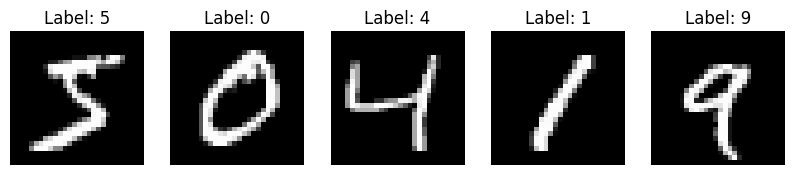

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [12]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Set de entrenamiento :", x_train.shape)
print("Etiquetas de entrenamiento:", y_train.shape)

print("Set de test:", x_test.shape)
print("Etiquetas de test:", y_test.shape)

Set de entrenamiento : (60000, 784)
Etiquetas de entrenamiento: (60000, 10)
Set de test: (10000, 784)
Etiquetas de test: (10000, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [14]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8765 - loss: 0.4428 - val_accuracy: 0.9607 - val_loss: 0.1310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9643 - loss: 0.1187 - val_accuracy: 0.9688 - val_loss: 0.1030
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9788 - loss: 0.0754 - val_accuracy: 0.9750 - val_loss: 0.0796
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9768 - val_loss: 0.0745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9763 - val_loss: 0.0773



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [16]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

Pérdida en el conjunto de prueba: 0.07734415680170059
Precisión en el conjunto de prueba: 0.9763000011444092


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [17]:
# Para el dataset MNIST, la principal ventaja de esta codificación es que el modelo evite interpretar las variables con una
# relación jerarquica u ordinal, lo cual no es el caso con la base MNIST con los dígitos del 0 al 9.

SyntaxError: invalid syntax (<ipython-input-17-dfa21d4b3a01>, line 1)

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [ ]:
# Aumentar la cantidad de neuronas resulta en una mayor capacidad para aprender patrones complejos y relaciones más intrincadas
# entre los datos de entrada y salida. Al mismo tiempo, si se aumenta demasiado, la red puede volverse demasiado compleja y
# susceptible al overfitting,

# Si disminuyes el número de neuronas en la capa oculta, la capacidad de aprendizaje del modelo se reduce. Una capa oculta con
# muy pocas neuronas puede no ser capaz todas las relaciones importantes en el entrenamiento, resultando en un bajo rendimiento
# de clasificación.

### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [ ]:
Una alternativa que propondría al optimizador `adam` es SGD con Momentum** (Stochastic Gradient Descent con Momentum).

Aunque `adam` es un optimizador muy popular y generalmente eficiente, hay situaciones donde **SGD con Momentum** puede ser una buena
alternativa e incluso superar a `adam`:

1.  SGD con Momentum es conceptualmente más simple que Adam. Adam mantiene estimaciones exponenciales promedio de los gradientes y
los gradientes cuadrados, lo que añade complejidad. SGD con Momentum simplemente utiliza un promedio móvil de los gradientes para
acelerar el descenso en la dirección correcta y amortiguar las oscilaciones. Esto puede dar más control al ajustar los hiperparámetros
 (tasa de aprendizaje y momentum) si se comprende bien el comportamiento del gradiente.

2.  **Problemas de Convergencia en Ciertos Escenarios:** Aunque `adam` suele converger más rápido al principio del entrenamiento,
a veces puede tener problemas para alcanzar la mejor generalización en el conjunto de prueba en comparación con SGD con Momentum,
especialmente cuando el paisaje de la función de pérdida es complejo o no convexo. Esto puede deberse a que `adam` normaliza los
gradientes por su varianza estimada, lo que a veces puede llevar a pasos demasiado pequeños al final del entrenamiento o a una
convergencia a mínimos locales subóptimos.

3.  **Rendimiento en Conjuntos de Datos Específicos:** En algunos conjuntos de datos y arquitecturas de redes neuronales específicas,
SGD con Momentum ha demostrado obtener mejores resultados en términos de precisión final en el conjunto de prueba que `adam`. Esto no
es una regla general, pero es una observación empírica en ciertas áreas, como la visión por computadora.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [ ]:
# El desempeño en el conjunto de entrenamiento generalmente mejorará o se mantendrá. Esto ya que la red neuronal tendrá más oportunidades
# para ajustar sus pesos y sesgos. El riesgo de entrenar más épocas es el sobreajuste, lo que puede resultar en un desempeño pobre ante
# datos nuevos sin aprender patrones generales la distribución de datos.

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [ ]:
# La razón principal es obtener una evaluación objetiva del desempeño del modelo con datos no vistos previamente o que no fueron parte de su entrenamiento.
# Esta división permite:

# 1.  Evaluar la capacidad de analisis que le permitan al modelo hacer predicciones precisas sobre*datos nuevos que nunca ha visto.
# 2.  Ajustar hiperparámetros de con evaluaciones cuantitativas de precisión y desempeño en las estimaciones.
# 3.  Comparar diferentes algoritmos o modelos para una tarea específica.
